# 18 - Stata Workflow Guide

Marina Adshade, Paul Corcuera, Giulia Lo Forte, Jane Platt  
2024-05-29

## Prerequisites

1.  Knowledge of the content of the previous modules: macros, opening
    data sets, creating graphs, regression analysis.

## Learning Outcomes

1.  Develop foundational skills and practices for workflow management in
    research and data applications.
2.  Improve coding style, especially for collaborative settings.
3.  Use the secure file-hosting service UBC OneDrive to store, share,
    and synchronize folders.
4.  Implement conditional operators to automate workflow processes.

## 18.0 Intro

In [1]:
import stata_setup
stata_setup.config('C:\Program Files\Stata18/','se')

In [2]:
>>> import sys
>>> sys.path.append('/Applications/Stata/utilities') ## make sure this is the same as what you set up in Module 01, Section 1.3: Setting Up the STATA Path
>>> from pystata import config
>>> config.init('se')

Significant credit for the content of the module must go to Asjad Naqvi
and this very useful post on [The Stata Guide on
Medium](https://medium.com/the-stata-guide/the-stata-workflow-guide-52418ce35006).

## 18.1 Introduction to Workflow Management

Structuring our files and folders early on will save us a lot of time
and effort throughout our research projects. The approach covered in
this notebook will make it easier for us to keep track of our progress
and reduce our workload later on. This approach will be particularly
important if we are working in a group, with several co-authors on one
project.

In this module, we will discuss how to manage files and scripts as part
of the research workflow. We will also cover how to stylize code to make
it easy to read and replicate. While these are not strict rules,
consider them guidelines for research and data management.

## 18.2 Setting Up the Directory

### 18.2.1 Main Folder

Over the course of a research project, we are likely to accumulate
numerous files for our project, including raw data files, do-files,
tables, graphs, and figures. In fact, there are often many versions of
each of these files as well! We will always want to start by creating a
main folder, or a “root” folder, where *all* of our project files and
folders will be organized. If we are working with other people, we will
want to create these folders on a shared drive such as [UBC Microsoft
OneDrive](https://lthub.ubc.ca/guides/microsoft-onedrive-student-guide/).
More on this in a moment.

Within the main folder, we’ll want to sort all of our files into
sub-folders similar to the structure shown below:

<figure>
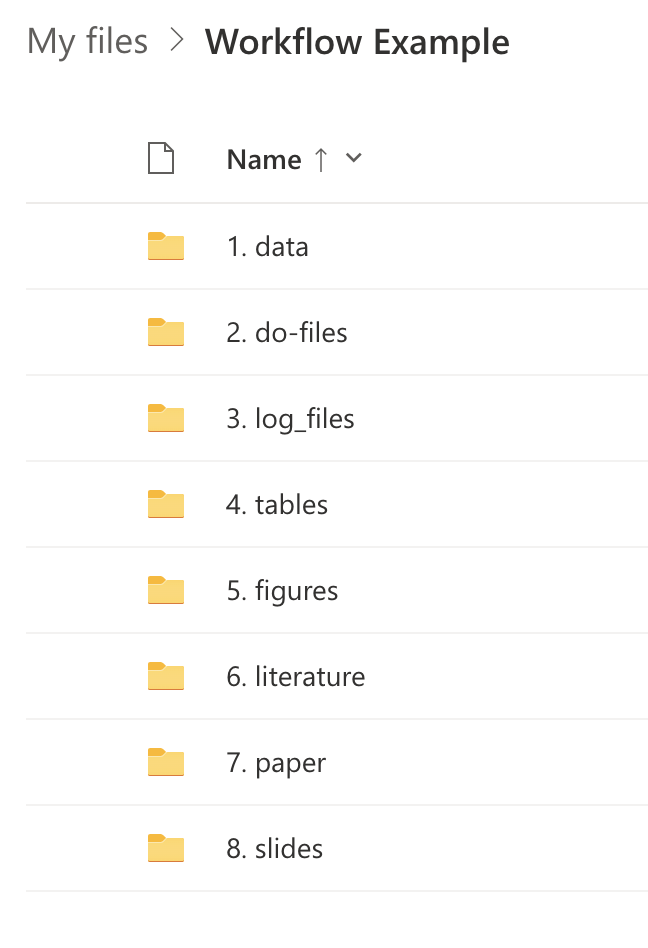
<figcaption aria-hidden="true">Main directory structure</figcaption>
</figure>

Each sub-folder consists of a specific category of files and is numbered
to indicate the workflow:

-   **data:** contains all the data files;
-   **do_files:** contains all the Stata do-files used to process, clean
    and analyze the data files;
-   **log_files:** contains all the Stata log-files;
-   **tables:** contains all the regression tables, summary statistics,
    etc.;
-   **figures:** contains all the graphs and figures;
-   **literature:** contains papers and documents related to the
    literature review;
-   **paper:** contains word documents or LaTeX files relating to the
    written part of your paper;
-   **slides:** contains presentation slides.

**Note:** We’ll want to avoid spaces, special characters, or capital
letters in our folder or file names. If we need to use spaces, we can
use underscores `_` . We will also want to number our files to indicate
our workflow.

### 18.2.2 Do-files Folder

It’s almost never a good idea to use one do-file for an entire project.
Instead, we will want to create different do-files for different tasks
and add descriptive labels to reflect our workflow. As mentioned in the
previous section, we should prefix our files with numbers to align with
the workflow sequence.

<figure>
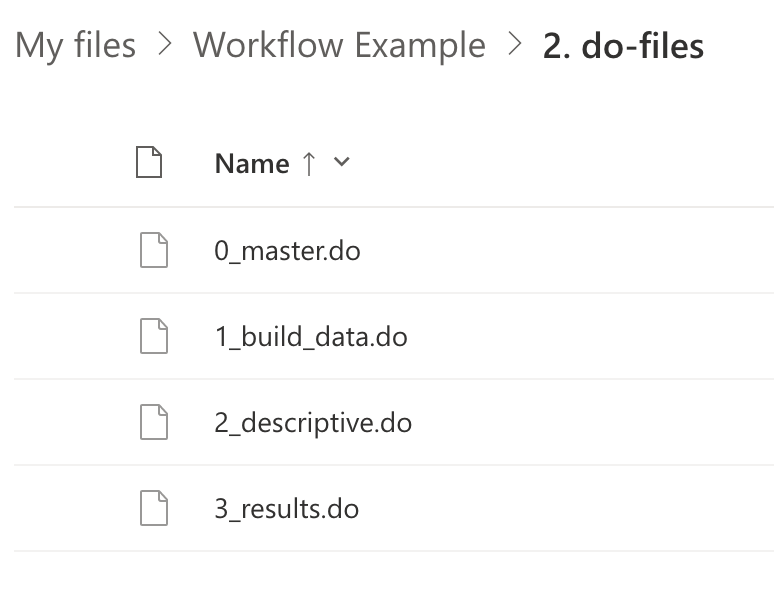
<figcaption aria-hidden="true">Scripts folder with example
do-files</figcaption>
</figure>

In the image above, the first do-file, `1_build_data.do`, cleans the raw
data and generates core variables that will be used in subsequent
scripts. The second do-file, `2_descriptive.do`, generates descriptive
statistics and relevant figures. The third do-file, `3_results.do`, runs
the final regressions and generates regression tables. The master
do-file, `0_master.do`, runs all these other do-files. We will discuss
its role in detail in a moment.

**Note:** Some researchers prefer to use different do-files for
different figures and tables, which is completely fine as long as the
files are labeled well. If we want to generate different tables and
figures within the same do-file, we should be sure to write them into
separate code blocks within a do-file so that they can be easily
distinguished.

### 18.2.3 Choosing Good File Names

While you are welcome to use your own naming conventions, it can be
helpful to prefix your file names with numbers to align with your
workflow; it is also a good idea to make these file names post-fixed
with version numbers. Version numbers can be `_v1`, `_v2`
(i.e. “ECON490_logfile_v12.txt”) or they can be indicated by dates
(i.e. “Thesis_logfile_230430.txt”).

**Note:** Following the yymmdd (year month date) format when using dates
will automatically sort our files with the latest version at the top.
Other date formats will not sort the files in the correct order and thus
defeat the purpose of adding a post-fixed version number.

As we make progress with our project, we might find ourselves collecting
many versions of the same files. As older versions become redundant, it
is best to delete them or move them to a temporary folder. Creating a
temporary folder for old do-files, tables, documents, etc. can be
helpful in keeping our main folders neat, especially if we are hesitant
to delete them or if we are susceptible to digital hoarding (like many
of us).

## 18.3 Setting Up the Master Do-File

### 18.3.1 Compiling Do-Files with the Master Do-File

We can think of the master do-file, `0_master.do`, as a “compiler”: it
runs all, or some, of the do-files for everything in our project. This
master do-file file should be structured something like this:

In [3]:
%%stata
    /* Project info */

    clear

    /* Directory settings: paths to folders, defined as globals */

    /* Project settings: such as global variables and other macros */

    /* Run the do-files: runs all of the do-files for the project */ 


The master file begins with project information, usually included in a
block comment followed by the `clear` command. We then establish our
**directory settings** and **project settings**, both of which are
defined below. The final component of the script is to **run the
do-files** in our project.

Each of these three components is discussed in turn below with the code
that will be included in this master do-file.

### 18.3.2 Directory Settings

Above, we indicated that our master do-file will contain **directory
settings**. Here is an example of what those should look like.

There are two essential tools utilized in this master file:

1.  Relative file paths
2.  Macros (i.e. locals and globals)

As we learned in [Module
4](https://comet.arts.ubc.ca/docs/Research/econ490-pystata/04_Locals_and_Globals.html),
macros store information either temporarily with `local` objects or
permanently with `global` objects. Locals store information within a
code instance and disappear once the instance ends. Globals are stored
in memory until you close Stata, hence they are considered “permanent”.

In this workflow example, we will define the key paths in globals.

-   The unique name of our project is stored in the global called
    *proj_name*.
-   The path to our main folder (defined above) is stored in the global
    *proj_main*.
-   Each sub-directory’s path has its own global; for example, the path
    to the data folder is called *data*. Note that we don’t need to
    specify the full file path for each sub-directory, as it would be
    already included in the main folder. For example, for the data
    folder, we can simply use `${proj_main}/data`.

Here is an example. Be sure to edit this information for your own
project!

In [4]:
%%stata

*********************
* Directory Settings
*********************


global proj_name "Fake Project"
global proj_main "$file_path/projects/${proj_name}"
global datadir "${proj_main}/data"                  // Raw Files and Output from those
global figdir "${proj_main}/figures"                // Figure path
global tabledir "${proj_main}/tables"               // Tables Path
global do_dir "${proj_main}/do_files"                // Do-files path
global log_dir "${proj_main}/logfiles"              // Log-file path

Setting up the directory using globals can be very useful. Imagine that
in the do-file called `1_build_data.do`, we want to load our data set
saved under the file name *fake_data.csv* in the data folder *data* in a
sub-directory called *raw*. Instead of defining the full file path of
*fake_data.csv*, we can conveniently use our globals as follows:

In [5]:
%%stata
import delimit using ${datadir}/raw/fake_data.csv, clear

where we are telling Stata to go to the folder *raw* within the folder
specified by the global *datadir* that we had defined earlier.

### 18.3.3 Run the do-files

The final component of the master do-file is the running of the
do-files. Here, we go over a simple example without using the project
settings. The optional approach with those settings is further below.

As we saw in [Module
2](https://comet.arts.ubc.ca/docs/Research/econ490-pystata/02_Working_Dofiles.html),
we run a do-file by using the command `do` followed by the file path of
the appropriate do-file.

For example, if we wanted to run the do-file that builds the data
(`1_build_data.do`) that is stored in the folder indicated by the global
`do_dir`, we would use the following command:

In [6]:
%%stata
do "${do_dir}/1_build_data.do"

In our master do-file, we would include the code for running all the
do-files like this:

In [7]:
%%stata
******************
* Run the do-files
******************

do "${do_dir}/1_build_data.do"

do "${do_dir}/2_descriptive.do"

do "${do_dir}/3_results.do"

The master do-file simply runs all of the project do-files in the
appropriate order. Notice how the naming convention makes it easy to
identify the sequence in which we need to run the do-files. File names
are descriptive and sequentially numbered.

### 18.3.4 Using UBC Microsoft OneDrive

Let’s say that have been asked to create a series of folders that will
hold all of the information for our project. There are good reasons for
keeping those folders on UBC OneDrive. We might, for example, want to be
able to access that information when we are away from your computer (for
example, working in a lab). We might (legitimately!!) be concerned that
all of our hard work will be lost if our computer is damaged or stolen.
Finally, we might be working as part of a group - in which case file
sharing will be necessary! Setting up OneDrive and installing the
application on your own computer will resolve all of those issues.

[UBC Microsoft
OneDrive](https://lthub.ubc.ca/guides/microsoft-onedrive-student-guide/)
is a secure file-hosting service that allows us to store, share, and
synchronize files and folders from any connected devices. You can learn
how to store files on this service from the link provided above, but
here we are going to cover how to access these files directly from Stata
on any computer.

To begin, we need to follow the instructions for our operating system to
install the Microsoft OneDrive application on any computer that we want
to work on. Once we have complete this process, we will see a new folder
in our computer directory which contains all of the files in our
OneDrive folder.

To see how this works, we can edit the command below to access that
directory on our computer. You will need to determine the file path on
your computer and edit the example path here. When we run this command,
Stata will understand that it should use this directory moving forward.
We have also included `dir` so that we can see our folders in that
directory. If we have already set up the folders for our project, we
will see them there.

In [8]:
%%stata

cd "/Users/fake_user/Library/CloudStorage/OneDrive-UBC"
dir

Now whenever we include the file paths in our globals or do-files, we
can point to our UBC OneDrive folders, and always have access to the
most recent version of our work!

## 18.4 Best Practices for Writing Code

There are three core practices that will make it easy to write, edit and
understand code:

1.  Adding comments.
2.  Splitting up code into multiple lines.
3.  Indenting and spacing code.

### 18.4.1 Commenting

Leaving comments will not only help us remember what we have done, but
it will help our group members, TAs, instructors, and supervisors
understand our thought process.

There are three ways to comment in a Stata do-file:

In [9]:
%%stata
* comments on individual lines

// comments on individual lines and after some code

/*
comments on multiple lines
like a "code block"
*/

We can also use a series of asterisks `*` to format our do file and
partition your code. In the `0_master.do` example we saw earlier, the
directory settings were highlighted as such. See the example again
below:

In [10]:
%%stata
********************
* Directory Settings
********************

Formatting do-files in this manner creates visual bookmarks and
highlights different sections of our script.

Another use for comments is to “comment out” code that we might be
testing or might need later. Use an asterisk to comment out a line:

In [11]:
%%stata
*gen log_earnings = log(earnings)

Or comment out a block of code:

In [12]:
%%stata
/*
label variable workerid "ID"
la var treated "Treatment Dummy"
la var earnings "Earnings"
la var year "Calendar Year"
*/

Most importantly, we should leave comments before and after our code to
explain what we did!

In [13]:
%%stata
* Open Raw Data
import delimit using "${datadir}/raw/fake_data.csv", clear

la var birth_year "Year of Birth" // label variable

As we move on to writing more complex code, leaving comments will become
more helpful.

### 18.4.2 Splitting the Code Across Lines

In Stata, we can split code across multiple lines using three forward
slashes `///`. This can be particularly useful when making graphs. Let’s
see an example to understand why. Imagine we want to create a graph
overlaying information for treated workers and untreated workers, such
that they are marked with two different colors (we covered in detail how
to do this in [Module
9](https://comet.arts.ubc.ca/docs/Research/econ490-pystata/09_Stata_Graphs.html).
The line of code to do it is:

In [14]:
%%stata
twoway (connected log_earnings year if treated) || (connected log_earnings if !treated), ylabel(#8) xlabel(#10) ytitle("Log-earnings") xtitle("Year") legend( label(1 "Treated") label(2 "Control"))

Making a graph has a lot of small components, all clustered together in
a single line of code. If we had to go back and change the number of
ticks for the x-axis `xlabel(#)`, it is safe to say it might take us a
moment to parse through all this code.

Now, let’s format this code block using `///` to split it across
multiple lines:

In [15]:
%%stata
twoway ///
    (connected log_earnings year if treated) || (connected log_earnings year if !treated) , ///
    ylabel(#8)  xlabel(#10) ///
    ytitle("Log-earnings") xtitle("Year") ///
    legend( label(1 "Treated") label(2 "Control"))

Is it easier for you to find `xlabel(#)` this time around?

Using `///` is a simple step we can take to make code blocks appear neat
and legible.

### 18.4.3 Indent and Space our Code

Using indentations in our code and spacing it neatly can improve its
readability with little effort. We can use the `tab` button on our
keyboard to indent and organize our code. Let’s reformat the last
example to see this in action.

In [16]:
%%stata
twoway                                              ///
    (connected log_earnings year if treated)        ///
    ||                                              ///
    (connected log_earnings year if !treated)       ///
        ,                                           ///
        ylabel(#8)                                  ///
        xlabel(#10)                                 ///
        ytitle("Log-earnings")                      ///
        xtitle("Year")                              ///
        legend(                                     ///
            label(1 "Treated")                      ///
            label(2 "Control")                      ///
        )

This is the same code block as before, but it is significantly easier to
read this time around. Try to find `xlabel(#)` once again. Do you notice
any difference?

We might not want to indent our code on such a granular level as shown
in the example above. That’s okay, as long as the code is organized in a
way that is clear to us and our collaborators and is generally easy to
understand.

### 18.4.4 Putting it All Together

Let’s review a final example which combines all the code styling tools
we have discussed so far:

In [17]:
%%stata
twoway                                              ///
    (connected log_earnings year if treated)        ///     // log earnings, treated vs control group
    ||                                              ///
    (connected log_earnings year if !treated)       ///
        ,                                           ///
        ylabel(#8)                                  ///     // label ticks
        xlabel(#10)                                 ///
        ytitle("Log-earnings")                      ///     // axis titles
        xtitle("Year")                              ///
        legend(                                     ///     // legend labels
            label(1 "Treated")                      ///
            label(2 "Control")                      ///
        )

The comments in this example might seem unnecessary since the code is
self-explanatory. However, depending on our familiarity with Stata (or
coding in general) and the complexity of the code, adding comments that
seem obvious at the time can be helpful when we revisit work days or
weeks later. As students of economics, we understand that there is an
opportunity cost to everything, including time spent deciphering code we
have already written.

## 18.5 More on Project Settings (optional)

Our workflow can be simplified by defining project settings in the
master do-file that determine which do-files are run and whether or not
log-files are generated. We can think of project settings as a series of
switches that we can switch on and off in our work. For example, we
could turn the switch to “off” for the do-file that builds the data when
the data has already been fully processed and saved in our folder, or we
could turn the switch to “on” to create a log-file when we want to keep
a record of the run of the do-file.

If we choose to include project settings in our master do-file, we will
need to include specific lines of codes in the project settings and in
the *run* settings of the master do-file, as well as in the *store_log*
settings of specific do-files. We will see each of the three components
below.

### 18.5.1 Project Settings

For each step of the process settings, we will create globals to do the
following:

1.  *Run* globals that will switch on and off the running of certain
    do-files (`run_build`, `run_descriptive`, `run_mainresults`)
2.  *Store* globals that will switch on and off the creation of
    log-files (`store_log_build`, etc.).

These process settings will look like this:

In [18]:
%%stata
*******************
* Project Settings:
*******************

*Step 1: Build intermediate and final data set from raw data

global run_build = 1                // 0 = skip build step; 1 = run build.do
global store_log_build = 1          // 0 = don't save log file; 1 = save log file


*Step 2: Run descriptive analysis

global run_descriptive = 1          // 0 = skip; 1 = run
global store_log_descriptive = 1    // 0 = don't save log file; 1 = save log file


*Step 3: Run main results (e.g. regressions)

global run_mainresults = 1          // 0 = skip; 1 = run
global store_log_mainresults = 1    // 0 = don't save log file; 1 = save log file

At this stage, our settings don’t mean much; we have simply created
globals and assigned them a specific value. When we reference these
globals in our master do-file and in other do-files, these settings will
become meaningful. The values we choose to assign these globals will
determine which actions occur and which don’t.

`run` settings are referenced in two cases:

1.  In the master do-file under the “run project” section.
2.  In the beginning of the project do-files, when required.

`store_log` settings are referenced in two cases:

1.  Always at the beginning of the project do-files (excluding the
    master do-file).
2.  Always at the end of the project do-files (excluding the master
    do-file).

These will be discussed in more detail below.

### 18.5.2 *run* settings

Let’s consider how we might now run our do-files in the master do-file
if we are using the `run` settings.

In [19]:
%%stata
******************
* Run the do-files
******************

if ${run_build}==1{
    do "${do_dir}/1_build_data.do"
}


if ${run_descriptive}==1{
    do "${do_dir}/2_descriptive.do"
}


if ${run_mainresults}==1{
    do "${do_dir}/3_results.do"
}

This is almost the same as the code block we saw earlier to run all our
do-files. The key difference is that each command is nested within an
`[if]` statement.

The `[if]` statements correspond to the global settings: IF the
statement `${some_global}==1` is TRUE, THEN run the command in the curly
brackets, which is `do "filename"`. Can you guess what happens if the
statement is FALSE?

There’s one missing piece in this story. The comments in the settings
say that assigning a value of `0` to a global skips that action. You may
have noticed, however, that the `[if]` statement would return as FALSE
for any value of `global run_build` as long as it is not equal to 1.

We could set `global run_build = 8` and Stata would still return the
statement `${run_build}==1` as FALSE. The question remains: when does
`0` become relevant?

To understand this, we have to think of our master do-file as a very
long script that links all the other do-files together. Let’s consider a
scenario where we want to skip the build step. This means our script
begins with `2_descriptive.do`; however, `2_descriptive.do` includes
commands to work with the data set we opened in `1_build_data.do`. Note
that we don’t open the data set in the beginning of each do-file over
and over again. This means we need to add a condition in the beginning
of the `2_descriptive.do` script where we open the correct data set in
the event we skip the first step.

In [20]:
%%stata
if ${run_build}==0 {
    use "${datadir}/final/main_data.dta", clear
}

This clearly defines a situation where, if we skip the build data step,
then we load the correct data set in Stata to run `2_descriptive.do` .

Similarly, if we were to skip the first two steps, then we would have to
load the correct data set to run the results (i.e. step 3). We include
the following command in the beginning of `3_results.do` to address this
problem.

In [21]:
%%stata
if ${run_build}==0 & ${run_descriptive}==0 {
    use "${datadir}/final/main_data.dta", clear
}

As you might have noticed, all scenarios where we skip a step are
associated with `if ${some_global}==0`. As a result, we limit the values
assigned to the global settings to 0 and 1.

### 18.5.3 *store_log* settings

Now let’s take a look at the `store_log` settings, which help us
automate the process of storing log-files.

Imagine that all do-files except `0_master.do` include the `log` command
in the beginning and end of the file. The `log` command is nested within
an `[if]` statement related to the global settings, exactly like we saw
earlier.

In [22]:
%%stata
*If log setting is activated, we record a log file in the log folder
if ${store_log_descriptive}==1 {
    cap log close
    log using "${log_dir}/2_descriptive.log", replace
}

*Close log if needed
if ${store_log_descriptive}==1 {
    cap log close
}

First, we start with an `[if]` statement which makes our global settings
viable. Within the curly brackets we include `cap log close` to ensure
that any open log-files from prior attempts are closed before we open
the log-file. Then we use
`log using "${log_dir}/2_descriptive.log", replace` which generates a
log-file stored in the log directory `log_dir` (we defined this in the
master file) and saves it under the name `2_descriptive.log`. Finally,
at the end of the script, we include a command to close the log-file.

We include this code within each of the do-files, only changing the
`store_log` global and the name of the log-file to match the appropriate
step.

## 18.6 Wrap Up

In this notebook, we looked at how to use UBC OneDrive to securely store
projects. We explored how to structure a project directory, how to name
files, and how to separate scripts. We also discussed important file
types to include and best practices for coding more generally. Finally,
we looked at how to use globals to improve the functionality of our
master do-file.